Diodes
===

The incident flux and the current that is generated by a photodiode subjected to it are related by

$$
\begin{equation}
\begin{split}
I(A)=&\sum_{i,j}P_{i,j}(W)R_{j}(A/W)+D(A)\\
P_{i,j}(W)=&I_{i,j}(Hz)E_{j}(\text{keV})\\
R_{j}(A/W)=&\frac{e(C)}{E_{h}(\text{keV})}[1-e^{-\mu(E_{j})\rho d}]
\end{split}
\end{equation}
$$

where P the incident power, R the spectral responsivity, D the dark current, $E_i$ the energy of the incident photon, $E_j$ the energy of the detected photon, $E_{h}$ the energy to create an electron-hole pair, $I_{i,j}$ the detected flux of line $j$ due to line $i$ and diode density $\rho$, mass attenuation coefficient $\mu$ and thickness $d$.

The relationship between the detected flux and the flux at the sample position is given by

$$
\begin{equation}
I_{i,j}(Hz)=I_{0}(Hz) Y_{i,j} = I_{s}(Hz)\frac{Y_{i,j}}{\sum_k w_k T_{s}(E_{k})}
\end{equation}
$$

where $I_0$ the total flux before detection, $I_s$ the total flux seen by the sample, $T_s$ the "transmission" between point of detection and sample and $w_k$ the fraction of primary photons with energy $E_{k}$. The conversion factor $Y_{i,j}$ can be simply $w_i$ in case of direct detection or it can be the product of $w_i$ with solid angle and fluorescence/scattering rate in case of indirect detection.

The relationship between the flux reaching the sample and the current measured by a pn-diode can be summarized as

$$
\begin{equation}
\begin{split}
I(A)=&I_{s}(Hz)C_s(C)+D(A)\\
C_s(C) =& \frac{\sum_{i,j} Y_{i,j}C_j}{\sum_k w_k T_{s}(E_{k})}\\
C_j(C) =& E_{j}(\text{keV})\frac{e(C)}{E_{h}(\text{keV})}[1-e^{-\mu(E_{j})\rho d}]\\
\end{split}
\end{equation}
$$

where $C_s$ the charge generated per photon reaching the sample and $C_j$ the charge generated per photon reaching the diode.

Finally in order to allow a fast read-out, current is converted to frequency by an oscillator

$$
\begin{equation}
I(\text{Hz})=\frac{F_{\text{max}}(Hz)}{V_{\text{max}}(V)}
\frac{V_{\text{max}}(V)}{I_{\text{max}}(A)}I(A)+F_{0}(Hz)
\end{equation}
$$

where $F_{\text{max}}$ the maximal frequency that can be detected, $F_{0}$ a fixed offset, $V_{\text{max}}$ the maximal output voltage of the ammeter and input voltage of the oscillator, $\frac{V_{\text{max}}(V)}{I_{\text{max}}(A)}$ the "gain" of the ammeter. Sometimes $I_{\text{max}}(A)$ is referred to as the diode "gain".

Absolute diode
--------------
An absolute diode has a spectral responsivity $R(A/W)$ which behaves as theoretically expected

PN-diode:
 Ionization energy = 3.67655290856 eV
 Material = Si (0.00278059871276 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+05 V / A
 Dark current = 0.0 e / s
Secondary target:
 None
Optics:
 None
Before sample: False
Voltage-to-Frequency:
 None


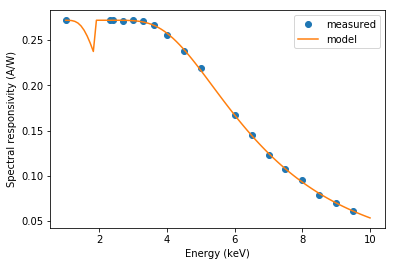

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from spectrocrunch.detectors import diode
det = diode.factory("sxm_ptb")
print(det)

det.model = False
energy = det.menergy
R = det.spectral_responsivity(energy)
plt.plot(energy,R,marker='o',linestyle="",label='measured')

det.model = True
energy = np.linspace(1,10,100)
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='model')

plt.legend()
plt.xlabel('Energy (keV)')
plt.ylabel('Spectral responsivity (A/W)')
plt.show()

Calibrated diode
----------------
The spectral responsivity $R(A/W)$ of a calibrated diode is determined by the difference in response with an absolute diode

PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.03 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+05 V / A
 Dark current = 674083041.889 e / s
Secondary target:
 None
Optics:
 None
Before sample: False
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 32 Hz


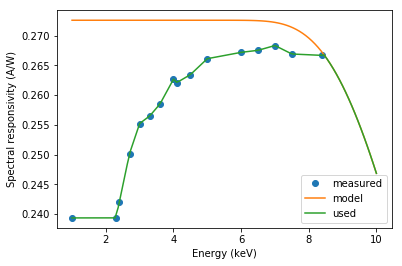

In [2]:
det = diode.factory("sxm_idet")
print(det)

det.model = False
energy = det.menergy
R = det.spectral_responsivity(energy)
plt.plot(energy,R,marker='o',linestyle="",label='measured')

det.model = True
energy = np.linspace(1,10,100)
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='model')

det.model = False
R = det.spectral_responsivity(energy)
plt.plot(energy,R,label='used')

plt.legend(loc='best')
plt.xlabel('Energy (keV)')
plt.ylabel('Spectral responsivity (A/W)')
plt.show()

Direct detection
------------------

When $Y_{i,j}=w_i$ and $T_s=1$ the diode measures $I_s$ directly. The relationship between flux $I_s(Hz)$ and diode response $I(Hz)$ is determined by the spectral responsivity which should be known (absolute diode) or calibrated (with respect to an absolute diode):

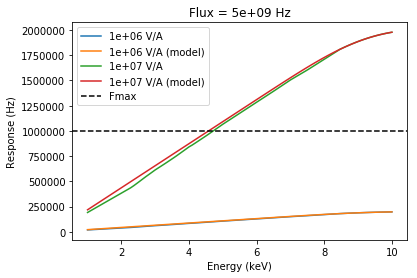

In [3]:
Is = 5e9
energy = np.linspace(1,10,100)

for gain in [1e6,1e7]:
    for model in [False,True]:
        det.gain = gain
        det.model = model
        I = [det.fluxtocps(en,Is).to("Hz").magnitude for en in energy]
        plt.plot(energy,I,label="{:.0e} V/A{}".\
                 format(gain," (model)" if model else ""))

plt.gca().axhline(y=det.oscillator.Fmax.to("Hz").magnitude,label="Fmax",\
                  color='k',linestyle='--')

plt.title("Flux = {:.0e} Hz".format(Is))
plt.legend(loc='best')
plt.xlabel('Energy (keV)')
plt.ylabel('Response (Hz)')
plt.show()

Indirect detection
------------------

The conversion factors $Y_{i,j}$ can be calculated from the cross-sections of the secondary target.

### Without optics
When the indirect diode measures the flux downstream from the optics (or there are no optics at all), the relationship between flux and measured count-rate is known (because $T_s$ is known):

Source:
 Linear degree of polarization = 0.95 
 Phase retardation = 90.0 deg
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+09 V / A
 Dark current = 0.0 e / s
Secondary target:
 Multilayer (ordered top-bottom):
 Layer 0. 0.5 um (Ti)
 Layer 1. 0.5 um (silicon nitride)
Optics:
 None
Before sample: True
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz
Geometry:
 In = 90 deg
 Out = 70 deg (reflection)
 Solid angle = 4*pi*0.4 srad


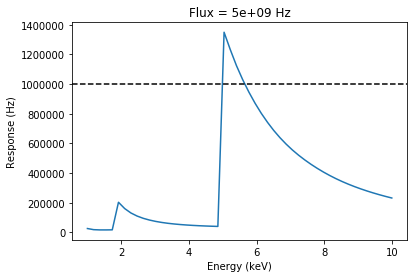

In [4]:
iodet = diode.factory("sxm_iodet1")
iodet.gain = 1e9
print(iodet.geometry)

Is = 5e9
energy = np.linspace(1,10,50)
I = [iodet.fluxtocps(en,Is).to("Hz").magnitude for en in energy]
plt.plot(energy,I)

plt.gca().axhline(y=iodet.oscillator.Fmax.to("Hz").magnitude,label="Fmax",\
                  color='k',linestyle='--')

plt.title("Flux = {:.0e} Hz".format(Is))
plt.xlabel('Energy (keV)')
plt.ylabel('Response (Hz)')
plt.show()

### With optics

In case the indirect diode is upstream from the optics, transmission $T_s$ needs to be calibrated with a direct diode. This is done by measuring a changing flux at fixed energy, e.g. by scanning a series of attenuators. The flux is calculated from the direct diode and used to calibrate the response of the indirect diode:

spectrocrunch/math/fit1d.py:156: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x = np.linalg.lstsq(A, b)[0]


Source:
 Linear degree of polarization = 0.95 
 Phase retardation = 90.0 deg
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+08 V / A
 Dark current = -31107542689.2 e / s
Secondary target:
 Multilayer (ordered top-bottom):
 Layer 0. 0.5 um (Ti)
 Layer 1. 0.5 um (silicon nitride)
Optics:
 transmission:
 7 keV: 7.54950361958 %
Before sample: True
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz
Geometry:
 In = 90 deg
 Out = 70 deg (reflection)
 Solid angle = 4*pi*0.4 srad


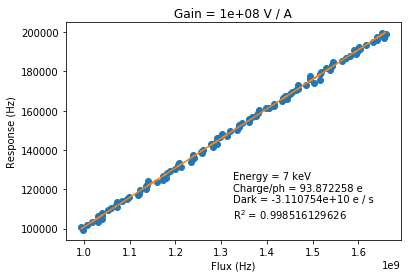

In [5]:
iodet = diode.factory("sxm_iodet1",optics="KB")
iodet.gain = 1e8

idet = diode.factory("sxm_idet")
idet.gain = 1e6

energy = 7
idetresp = np.linspace(3e4,5e4,100)
fluxmeas = idet.cpstoflux(energy,np.random.poisson(idetresp))

iodetresp = np.random.poisson(np.linspace(1e5,2e5,100))
fitinfo = iodet.calibrate(iodetresp,fluxmeas,energy,caliboption="optics")
print(iodet.geometry)

plt.plot(fluxmeas,iodetresp,marker='o',linestyle="")
plt.plot(fluxmeas,iodet.fluxtocps(energy,fluxmeas))
label = "\n".join(["{} = {}".format(k,v) for k,v in fitinfo.items()])
plt.annotate(label,xy=(0.5,0.1),xytext=(0.5,0.1),\
            xycoords="axes fraction",textcoords="axes fraction")

plt.title("Gain = {:~.0e}".format(iodet.gain))
plt.xlabel('Flux (Hz)')
plt.ylabel('Response (Hz)')
plt.show()

Note that the slope is $C_s(C)$ (the charge generated per photon reaching the sample, expressed here in units of elementary charge) and the intercept $D(A)$ (the dark current of the diode).

### Manual calibration

Calibration can also be done manually for a single flux-reponse pair. The response is expected to be $I(Hz)$ but it can also be $I(A)$. If you want a linear energy interpolation, calibration can also be simplified in which case it simply stores a lookup table for $C_s(C)$.

C$_s$ table
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+08 V / A
 Dark current = 0.0 e / s
Electrons/sample photon:
 6 keV: 62.2609311829 e
 10 keV: 31.1304655915 e
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz

Calibrated T$_s$
PN-diode:
 Ionization energy = 3.66856052632 eV
 Material = Si (0.1 cm)
Beam filters: None
Attenuators: None
Ammeter:
 Gain = 1.000000e+08 V / A
 Dark current = 0.0 e / s
Secondary target:
 Multilayer (ordered top-bottom):
 Layer 0. 0.5 um (Ti)
 Layer 1. 0.5 um (silicon nitride)
Optics:
 transmission:
 6 keV: 17.1204792628 %
 10 keV: 9.27452384084 %
Before sample: True
Voltage-to-Frequency:
 y hertz = 1.000000e+06 Hz/10 V * x V + 247 Hz



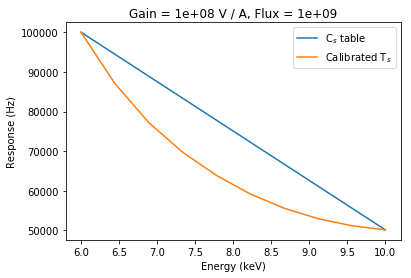

In [6]:
#Specify quantities manually with units:
#from spectrocrunch import ureg
#current = ureg.Quantity(1e-8,"A")

for simple in [True,False]:
    iodet = diode.factory("sxm_iodet1",optics="KB",simplecalibration=simple)
    iodet.gain = 1e8

    # Calibrate with Hz-Hz pair
    cps = 100000
    flux = 1e9
    energy = 6

    iodet.calibrate(cps,flux,energy,caliboption="optics")
    current = iodet.fluxtocurrent(energy,flux)

    # Calibrate with A-Hz pair
    energy = 10
    current *= 0.5
    iodet.calibrate(current,flux,energy,caliboption="optics")
    label = "C$_s$ table" if simple else "Calibrated T$_s$"
    print(label)
    print(iodet)
    print("")

    energy = np.linspace(6,10,10)
    response = [iodet.fluxtocps(en,flux).magnitude for en in energy]
    plt.plot(energy,response,label=label)

plt.legend()
plt.title("Gain = {:~.0e}, Flux = {:.0e}".format(iodet.Rout,flux))
plt.xlabel('Energy (keV)')
plt.ylabel('Response (Hz)')

plt.show()